## RNN- Recurrent Neural Network

In [1]:
%matplotlib inline
%env KERAS_BACKEND = tensorflow

import time
import locale
import random
import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from ipywidgets import interact
from ipywidgets import interact_manual
from sklearn.linear_model import LinearRegression
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import train_test_split

myfont = FontProperties(fname = r'c:\windows\fonts\simsun.ttc', size = 14)

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [2]:
# 由 Keras 讀入 IMDB
from keras.datasets import imdb

#RNN
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD, Adam

# something userful
from keras.utils import np_utils
from keras.preprocessing import sequence

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [3]:
print('訓練總筆數',len(x_train))

訓練總筆數 25000


In [4]:
print('測試總筆數',len(x_test))

測試總筆數 25000


In [5]:
y_train[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [6]:
len(x_train[24999])

153

In [7]:
x_train = sequence.pad_sequences(x_train, maxlen=150)
x_test = sequence.pad_sequences(x_test, maxlen=150)

In [8]:
x_train.shape

(25000, 150)

In [9]:
N = 3 #文字要壓到N維
K = 4 #LSTM有K個神經元

## 建構神經網路

## 【Model 1】打開一個空白的神經網路。

In [10]:
model_01 = Sequential()

In [11]:
model_01.add(Embedding(10000,N))
model_01.add(LSTM(K))

model_01.add(Dense(1, activation='sigmoid'))

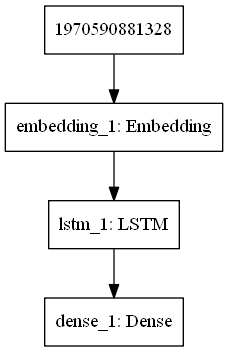

In [12]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import pydot
from keras.utils.vis_utils import plot_model
plot_model(model_01, to_file='Q10-1_RNN_model_01.png')
from IPython.display import Image
Image(filename="Q10-1_RNN_model_01.png")

## 【Compile & Training】

In [13]:
model_01.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
model_01.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 3)           30000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 128       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 30,133
Trainable params: 30,133
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_01_result = model_01.fit(x_train, y_train, batch_size = 32, epochs = 1)

Epoch 1/1
25000/25000 [==============================] - 77s 3ms/step - loss: 0.5046 - acc: 0.7565


## 【Model 2】

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 3)           30000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 384       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 30,393
Trainable params: 30,393
Non-trainable params: 0
_________________________________________________________________


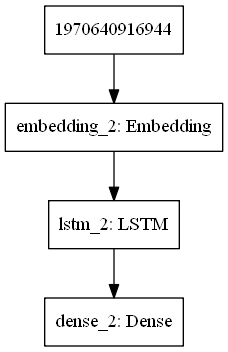

In [16]:
N1 = 3 #文字要壓到N維
K1 = 8 #LSTM有K個神經元

model_02 = Sequential()

model_02.add(Embedding(10000,N1))
model_02.add(LSTM(K1))

model_02.add(Dense(1, activation='sigmoid'))

model_02.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


model_02.summary()
from keras.utils.vis_utils import plot_model
plot_model(model_02, to_file='Q10-1_RNN_model_02.png')
Image(filename="Q10-1_RNN_model_02.png")

In [17]:
model_02_result = model_02.fit(x_train, y_train, batch_size = 32, epochs = 1)

Epoch 1/1
25000/25000 [==============================] - 80s 3ms/step - loss: 0.4801 - acc: 0.7590


In [18]:
model_02.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 3)           30000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 384       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 30,393
Trainable params: 30,393
Non-trainable params: 0
_________________________________________________________________


In [19]:
predict_01 = np.argmax(model_01.predict(x_test), axis = 1)
score_01 = model_01.evaluate(x_test, y_test)
print('model_01 loss',score_01[0])
print('model_01 正確率',score_01[1] * 100 ,'%')

predict_02 = np.argmax(model_02.predict(x_test), axis = 1)
score_02 = model_02.evaluate(x_test, y_test)
print('model_02 loss',score_02[0])
print('model_02 正確率',score_02[1] * 100 ,'%')

25000/25000 [==============================] - 14s 549us/step
model_01 loss 0.36802091979026796
model_01 正確率 84.932 %
25000/25000 [==============================] - 14s 545us/step
model_02 loss 0.3323591679954529
model_02 正確率 85.976 %


In [20]:
predict_01 = model_01.predict_classes(x_test)
predict_02 = model_02.predict_classes(x_test)

def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap = 'Greys')
    print('model_01 神經網路判斷為:',predict_01[測試編號])
    print('model_02 神經網路判斷為:',predict_02[測試編號])

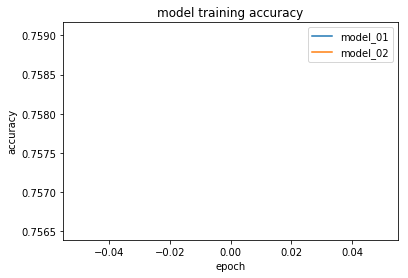

In [21]:
plt.plot(model_01_result.history['acc'])
plt.plot(model_02_result.history['acc'])

plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model_01','model_02'],loc = 'best')
plt.show()

In [22]:
model_json = model_01.to_json()
open('[NCTS]_Homework_Q10-1_Recurrent_Neural_Network_Model_01_DavidChi.json', 'w').write(model_json)
model_01.save_weights('[NCTS]_Homework_Q10-1_Recurrent_Neural_Network_Model_01_DavidChi.h5')

model_json = model_02.to_json()
open('[NCTS]_Homework_Q10-1_Recurrent_Neural_Network_Model_02_DavidChi.json', 'w').write(model_json)
model_02.save_weights('[NCTS]_Homework_Q10-1_Recurrent_Neural_Network_Model_02_DavidChi.h5')